# EE 379K Lab 4

## Rohan Nagar and Wenyang Fu

In [1]:
import numpy as np
import scipy as sp
import sympy
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Problem 1: Linear Algebra in Python

## Part 1

Consider the linear subspace $S = span\{v_1, v_2, v_3, v_4\}$ where $v_1 = [1, 2, 3, 4]$, $v_2 = [0, 1, 0, 1]$, $v_3 = [1, 4, 3, 6]$, $v_4 = [2, 11, 6, 15]$. Create a vector inside $S$ different from $v_1, v_2, v_3, v_4$. Create a vector not in $S$. How would you check if a new vector is in $S$?

In [2]:
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
mat = np.vstack((v1, v2,v3, v4))
reduced = sympy.Matrix(mat).rref()
reduced

(Matrix([
 [1.0,   0, 3.0, 2.0],
 [  0, 1.0,   0, 1.0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0]]), [0, 1])

### Vector is contained in $S$

In [5]:
vec_in_s = np.array([2, 4, 6, 8])
mat1 = np.vstack((mat, vec_in_s))
reduced = sympy.Matrix(mat1).rref()
reduced

(Matrix([
 [1.0,   0, 3.0, 2.0],
 [  0, 1.0,   0, 1.0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0]]), [0, 1])

### Vector not contained in $S$

In [8]:
vec_not_in_s = np.array([1, 1, 3, 4])
mat2 = np.vstack((mat, vec_not_in_s))
reduced = sympy.Matrix(mat2).rref()
reduced

(Matrix([
 [1.0,   0, 3.0,   0],
 [  0, 1.0,   0,   0],
 [  0,   0,   0, 1.0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0]]), [0, 1, 3])

### How would you check if a new vector is in $S$?

If a new vector is in $S$, then it must be expressable as a linear combination of the existing vectors in $S$.

## Part 2

Find the dimension of the subspace $S$.

A: The dimension of the subspace is 2.

In [28]:
mat = np.vstack((v1, v2,v3, v4))
reduced = sympy.Matrix(mat).rref()
s = np.array(reduced[0].tolist())  # Convert sympy matrix back to np.ndarray
s = s[~np.all(s == 0, axis=1)] # Drop non-linearly independent vectors
s = s.astype(np.float64) # Typecast sympy floats back into numpy floats
print(s)
print(s.shape[0])
rank = s.shape[0]

[[ 1.  0.  3.  2.]
 [ 0.  1.  0.  1.]]
2


## Part 3

Find an orthonormal basis for the subspace S.

A: The QR decomposition provides an easy way to find an orthornomal basis for the subspace S. The first $n$ columns of $Q$ (where $n = rank(span(S))$) constitute an orthonormal basis of $S$.

In [31]:
# Help from here:
# https://stackoverflow.com/questions/27176453/scipy-find-bases-of-column-space-of-matrix

q,r = np.linalg.qr(mat.T) # Transpose matrix to find column basis as opposed to row basis
print(q)
print(r)
orthonormall_basis = q[:, :rank]
print(orthogonal_basis)

[[-0.18257419  0.2236068   0.82454859  0.48660692]
 [-0.36514837 -0.67082039  0.40003314 -0.50659664]
 [-0.54772256  0.67082039 -0.00816077 -0.4999334 ]
 [-0.73029674 -0.2236068  -0.40003314  0.50659664]]
[[ -5.47722558e+00  -1.09544512e+00  -7.66811581e+00  -1.86225670e+01]
 [  0.00000000e+00  -8.94427191e-01  -1.78885438e+00  -6.26099034e+00]
 [  0.00000000e+00   0.00000000e+00  -1.02375271e-16  -1.07707511e-15]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -6.72908534e-16]]
[[-0.18257419  0.2236068 ]
 [-0.36514837 -0.67082039]
 [-0.54772256  0.67082039]
 [-0.73029674 -0.2236068 ]]


## Part 4

Solve the optimization problem $min_{x \in S}\| x - z^* \|_2$ where $z^* = [1, 0, 0, 0]$

In [40]:
# TODO

# Problem 2: PCA

## Part 1



In [ ]:
# Covariance matrices
cov1 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.7]]
cov2 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.01]]

# Generate the samples
label1_samples = np.random.multivariate_normal([0, 0, 0], cov1, 20)
label2_samples = np.random.multivariate_normal([1, 1, 1], cov2, 20)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(label1_samples.T[0], label1_samples.T[1], label1_samples.T[2], label='Label 1')
ax.scatter(label2_samples.T[0], label2_samples.T[1], label2_samples.T[2], c='r', label='Label 2')
ax.legend()
fig.show()

## Part 2

What do the points look like?

#### The label 1 points are labled in blue above. These points are more spread out and they go much lower in the $z$ direction than the label 2 points. It is also generally lower in value in the $x$ direction than the label 2 points. The label 2 points are more compact and closer together. They form more of an ellipsoid shape than the label 1 points.

## Part 3

In [ ]:
def covariance(X, Y):
    ''' 
    Finds the covariance of the two arrays X and Y.
    X and Y must be the same length.
    '''
    if len(X) is not len(Y):
        return None
    
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    
    total = 0
    for x, y in zip(X, Y):
        total += (x-X_mean)*(y-Y_mean)
        
    return total / (len(X) - 1)

# Concatenate
samples = label1_samples + label2_samples

# Calculate the covariance matrix
cov = [[covariance(col, col2) for col2 in samples.T] for col in samples.T]
print(np.array(cov))

## Part 4

In [ ]:
def largest_eigenvectors(cov):
    values, vectors = np.linalg.eig(cov)
    
    largest = max(values)
    second_largest = max(np.delete(values, np.nonzero(values==largest)[0][0]))

    first_vector = vectors[:,np.nonzero(values==largest)[0][0]]
    second_vector = vectors[:,np.nonzero(values==second_largest)[0][0]]
    
    return first_vector, second_vector
    
eigenvectors = largest_eigenvectors(cov)

# TODO: project label1_samples and label2_samples onto the two eigenvectors and plot with labels

Did PCA make it easier to distingush the two labels in two dimensions?

#### TODO: Answer here.

# Problem 3: Low Rank Approximation

## Part 1

Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a SVD on this matrix using $\tt{linalg.svd}$. You can perform a low-rank approximation by zeroing out singular values and keeping only the top $k$. Show the best rank for $k = 2$, $k = 5$, and $k = 10$ approximation to Mona Lisa.

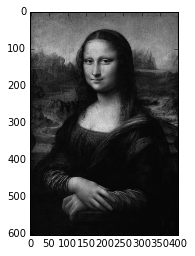

In [73]:
# Load the image
M = mpimg.imread('mona_lisa.png')
plt.imshow(M)

In [80]:
u, s, v = np.linalg.svd(M)

# TODO: low-rank approxmiation
print(M.shape)
print(u.shape)
print(s.shape)
print(v.shape)
print(M[0:2])

(603, 400, 4)
(603, 400, 400)
(603, 4)
(603, 4, 4)
[[[ 0.08627451  0.08627451  0.08627451  0.93725491]
  [ 0.26666668  0.26666668  0.26666668  0.97254902]
  [ 0.26666668  0.26666668  0.26666668  0.96862745]
  ..., 
  [ 0.29019609  0.29019609  0.29019609  0.96862745]
  [ 0.3019608   0.3019608   0.3019608   0.97254902]
  [ 0.30588236  0.30588236  0.30588236  0.93725491]]

 [[ 0.08627451  0.08627451  0.08627451  0.96862745]
  [ 0.24705882  0.24705882  0.24705882  1.        ]
  [ 0.24313726  0.24313726  0.24313726  1.        ]
  ..., 
  [ 0.30980393  0.30980393  0.30980393  1.        ]
  [ 0.3019608   0.3019608   0.3019608   1.        ]
  [ 0.32549021  0.32549021  0.32549021  0.96862745]]]


### Rank 2 Approximiation

[[  2.27120991e+01   1.06662595e+00   8.48406623e-16   7.13176189e-20]
 [  2.33366299e+01   1.03104186e+00   1.83459650e-15   1.24546186e-17]
 [  2.33624191e+01   9.12025273e-01   1.12102545e-15   1.07612666e-17]
 ..., 
 [  2.00422554e+01   2.79746920e-01   2.16128629e-17   2.13868362e-19]
 [  2.00434513e+01   2.96440154e-01   6.65883371e-17   8.30264911e-19]
 [  1.94197788e+01   2.87993133e-01   3.37775008e-16   1.35243679e-18]]
(603, 4)
(603, 4, 4)
[[[ 22.71209908   0.           0.           0.        ]
  [  0.           1.06662595   0.           0.        ]
  [  0.           0.           0.           0.        ]
  ..., 
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]]

 [[ 23.33662987   0.           0.           0.        ]
  [  0.           1.03104186   0.           0.        ]
  [  0.           0.           0.           0.        ]
  ..., 
  [  0.           0.   

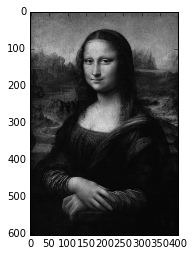

In [85]:
# Got inspiration from here:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

print(s)
s_rank2 = np.copy(s)
s_rank2[:, 2:] = 0
print(s_rank2.shape)

S = np.zeros(M.shape)
result = np.array([np.diag(row) for row in s_rank2])
print(result.shape)
S[:, :4, :4] = result
print(S)
rank2_approx = u @ S @ v
plt.imshow(rank2_approx)

# Rank 5 Approximiation

[[[  2.27120991e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   1.06662595e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   8.48406623e-16   0.00000000e+00]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]

 [[  2.33366299e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   1.03104186e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   1.83459650e-15   0.00000000e+00]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]

 [[  2.33624191e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   9.12025273e-01   0.000

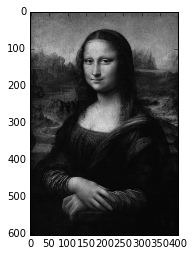

In [89]:
s_rank5 = np.copy(s)
s_rank5[:, 5:] = 0

S = np.zeros(M.shape)
result = np.array([np.diag(row) for row in s_rank5])
S[:, :4, :4] = result
print(S)
rank5_approx = u @ S @ v
plt.imshow(rank5_approx)

# Rank 10 Approximiation

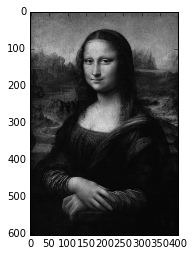

In [93]:
s_rank10 = np.copy(s)
s_rank10[:, 10:] = 0

S = np.zeros(M.shape)
result = np.array([np.diag(row) for row in s_rank10])
S[:, :4, :4] = result
rank10_approx = u @ S @ v
plt.imshow(rank10_approx)

## Part 2

If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa for each of those $k$ rank approximations?

A: 2-rank: 603 x 400 x 4 x 16 / 

# Problem 4: Kaggle

## Part 1

Make an account on Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

# Part 2

Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models. Then run a ridge regression using $\alpha = 0.1$. Make a submission of this prediciton, what is the RSME you get? (Hint: remember to exponentiate $\tt{np.expm1(ypred)}$ your predicitons).

In [ ]:
import pandas as pd
from scipy.stats import skew

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

In [ ]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

### Preprocessing

In [ ]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [ ]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

In [ ]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [ ]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

### Run our Ridge model

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1).fit(X_train, y)
preds = np.expm1(model.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("solution.csv", index = False)

With $\alpha = 0.1$, the Ridge predictions submitted on Kaggle gave a score of $0.13029$.

## Part 3

Try to build the best model you can. Report the best RSME you got on the Kaggle wall and how you got it.